<a href="https://colab.research.google.com/github/radara09/Tugas-Python/blob/main/Tugas_Besar_Python_M14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TUGAS BESAR PYTHON



RAHMAT HIDAYAT F - 1101194238 - TT-43-G11

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
frek1 = 700 #MHz
frek2 = 900 #MHz
frek3 = 1800 #MHz
tipe1 = 'urban'
tipe2 = 'suburban'
tipe3 = 'open'
ht = 80 #meter
hr = 1.5 #meter
d = np.random.randint(300,1001,200)
y1=d**2
y2=d**3
y3=d**4

In [ ]:
print(d)

[754 635 460 962 628 565 620 730 730 537 324 840 702 420 383 829 549 665
 885 494 525 842 929 465 669 833 959 471 381 356 566 692 856 396 598 840
 349 762 478 832 686 919 632 536 377 388 333 452 958 978 902 574 340 870
 774 661 952 478 357 824 401 389 540 471 887 603 956 371 540 598 755 835
 921 999 955 949 792 650 750 713 989 422 728 477 647 890 760 721 654 484
 606 968 668 600 690 311 884 429 806 806 777 302 469 808 705 644 945 799
 501 437 549 357 363 973 608 928 526 913 413 707 856 979 597 604 763 692
 560 832 304 923 768 636 517 311 379 905 580 438 739 989 850 929 429 981
 657 783 667 659 392 669 880 737 700 969 491 606 888 976 564 982 631 359
 931 870 452 731 418 416 908 961 444 828 533 453 498 822 427 329 714 586
 498 998 960 338 348 443 523 581 793 550 739 595 324 425 456 557 877 486
 470 896]


In [ ]:
def cos(frek,tipe,ht,hr,d):
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #d = jarak (meter)
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [ ]:
#Frekuensi 1800 MHz
LpUrban=cos(frek3,tipe1,ht,hr,d)
LpSuburban=cos(frek3,tipe2,ht,hr,d)
LpOpen=cos(frek3,tipe3,ht,hr,d)

#Model Urban
Lpf=cos(frek1,tipe1,ht,hr,d)
Lpf2=cos(frek2,tipe2,ht,hr,d)
Lpf3=cos(frek3,tipe3,ht,hr,d)

In [ ]:
#Frekuensi 1800 MHz
print(LpUrban)
print(LpSuburban)
print(LpOpen)

#Model Urban
print(Lpf)
print(Lpf2)
print(Lpf3)

[189.08004847 182.14773921 190.76473851 183.44807925 181.34259222
 180.52118874 189.63592775 182.5759253  190.08846924 186.0030837
 188.50132831 190.20345957 186.26516079 177.3208898  186.02511066
 190.65425765 180.74708972 185.06897316 189.63592775 180.35758368
 178.8661348  186.56487928 184.26936756 178.8661348  188.55660466
 177.52357297 189.22108832 188.33418576 192.2126664  188.61166494
 186.60718033 186.83759232 189.30852645 188.10819849 181.34259222
 178.15323031 186.98227982 189.63592775 184.99812856 186.62828331
 183.86470814 185.06897316 185.02178304 177.36166041 185.44090863
 186.45856755 185.95892618 189.77153638 189.32594913 178.26822064
 185.73603802 191.60390709 191.1981954  177.28000084 184.39347619
 185.2793939  187.76227077 177.07375648 182.46300896 179.08396756
 185.80327556 184.1692873  190.3175188  188.59333541 183.57960436
 180.05821908 192.15580966 188.70295649 184.56541147 178.8661348
 186.35144736 192.02703666 182.88185758 187.85921704 191.86803178
 181.0009026

In [ ]:
#Frekuensi 1800 MHz
d_sort=d[np.argsort(d)]
Urban_sort=LpUrban[np.argsort(d)]
Suburban_sort=LpSuburban[np.argsort(d)]
Open_sort=LpOpen[np.argsort(d)]

#Model Urban
d_sort=d[np.argsort(d)]
f_sort=Lpf[np.argsort(d)]
f2_sort=Lpf2[np.argsort(d)]
f3_sort=Lpf3[np.argsort(d)]

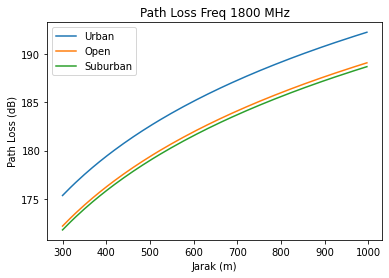

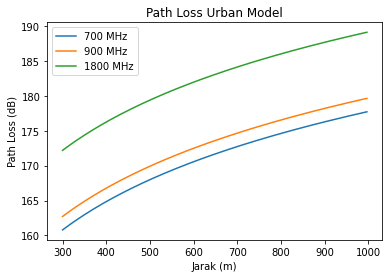

In [ ]:
plt.figure()
plt.title('Path Loss Freq 1800 MHz')
plt.plot(d_sort, Urban_sort, label='Urban')
plt.plot(d_sort, Open_sort, label='Open')
plt.plot(d_sort, Suburban_sort, label='Suburban')
plt.legend()
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()

#Model Urban
plt.figure()
plt.title('Path Loss Urban Model')
plt.plot(d_sort, f2_sort, label='700 MHz')
plt.plot(d_sort, f_sort, label='900 MHz')
plt.plot(d_sort, f3_sort, label='1800 MHz')
plt.legend()
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()

In [ ]:
#Daya Transmitter
def daytrans (ht, hl, gt, gr):
  dayter = (10*(np.log(ht))) - hl + gt + gr
  dayter = 10**(dayter/10)
  return dayter

power_tran = 30000
gain_tran = 10
gain_rece = 2

In [ ]:
PTUrban = daytrans(power_tran, Urban_sort, gain_tran, gain_rece)
PTSuburban = daytrans(power_tran, Suburban_sort, gain_tran, gain_rece)
PTOpen = daytrans(power_tran, Open_sort, gain_tran, gain_rece)
PTUrban2 = daytrans(power_tran, f_sort, gain_tran, gain_rece)
PTUrban3 = daytrans(power_tran, f2_sort, gain_tran, gain_rece)

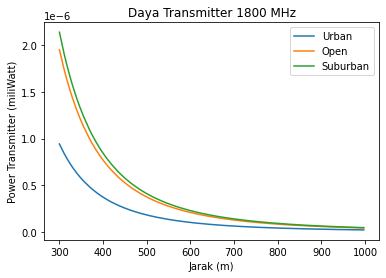

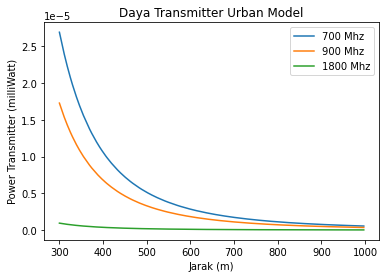

In [ ]:
#Frekuensi 1800 MHz
plt.figure()
plt.title("Daya Transmitter 1800 MHz")
plt.plot(d_sort, PTUrban, label = "Urban")
plt.plot(d_sort, PTOpen, label = "Open")
plt.plot(d_sort, PTSuburban, label = "Suburban")
plt.xlabel('Jarak (m)')
plt.ylabel('Power Transmitter (miliWatt)')
plt.legend()
plt.show()

#Model Urban
plt.figure()
plt.title("Daya Transmitter Urban Model")
plt.plot(d_sort, PTUrban3, label = "700 Mhz")
plt.plot(d_sort, PTUrban2, label = "900 Mhz")
plt.plot(d_sort, PTUrban, label = "1800 Mhz")
plt.xlabel('Jarak (m)')
plt.ylabel('Power Transmitter (milliWatt)')
plt.legend()
plt.show()

In [ ]:
def snr(dayter, BW):
  noise = -174 + 10*(np.log10(BW))
  noise = 10**(noise/10)
  sigtonoi = dayter/noise
  return sigtonoi

bw =  5*(10**6)

In [ ]:
SNRUrban = snr(PTUrban, bw)
SNRSuburban = snr(PTSuburban, bw)
SNROpen = snr(PTOpen, bw)
SNRUrban2 = snr(PTUrban2, bw)
SNRUrban3 = snr(PTUrban3, bw)

In [ ]:
#Signal to Noise Ratio
def snr(dayter, BW):
  noise = -174 + 10*(np.log10(BW))
  noise = 10**(noise/10)
  sigtonoi = dayter/noise
  return sigtonoi

bw =  5*(10**6)

In [ ]:
SNRUrban = snr(PTUrban, bw)
SNRSuburban = snr(PTSuburban, bw)
SNROpen = snr(PTOpen, bw)
SNRUrban2 = snr(PTUrban2, bw)
SNRUrban3 = snr(PTUrban3, bw)

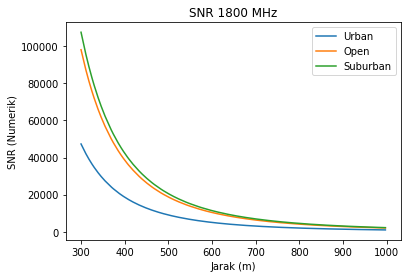

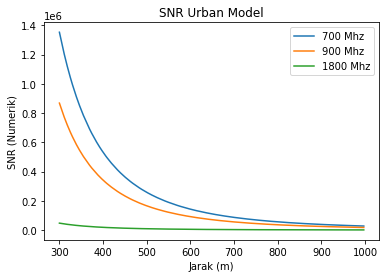

In [ ]:
#SNR Frekuensi 1800 MHz
plt.figure()
plt.title("SNR 1800 MHz")
plt.plot(d_sort, SNRUrban, label = "Urban")
plt.plot(d_sort, SNROpen, label = "Open")
plt.plot(d_sort, SNRSuburban, label = "Suburban")
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (Numerik)')
plt.legend()
plt.show()

#SNR Urban Model
plt.figure()
plt.title("SNR Urban Model")
plt.plot(d_sort, SNRUrban3, label = "700 Mhz")
plt.plot(d_sort, SNRUrban2, label = "900 Mhz")
plt.plot(d_sort, SNRUrban, label = "1800 Mhz")
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (Numerik)')
plt.legend()
plt.show()


In [ ]:
#Kapasitas Seluler 
def kapasitas (sig, BW):
  kpssel = BW*(np.log2(1+sig))
  return kpssel

In [ ]:
KapasitasUrban = kapasitas(SNRUrban, bw)
KapasitasSuburban = kapasitas(SNRSuburban, bw)
KapasitasOpen = kapasitas(SNROpen, bw)
KapasitasUrban2 = kapasitas(SNRUrban2, bw)
KapasitasUrban3 = kapasitas(SNRUrban3, bw)

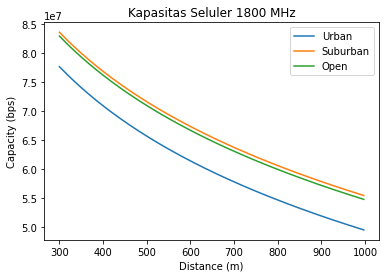

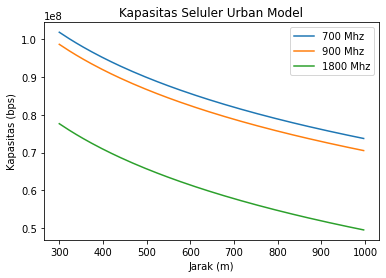

In [ ]:
#Kapasitas Seluler 1800 Mhz
plt.figure()
plt.title("Kapasitas Seluler 1800 MHz")
plt.plot(d_sort,KapasitasUrban, label = "Urban")
plt.plot(d_sort,KapasitasSuburban, label = "Suburban")
plt.plot(d_sort,KapasitasOpen, label = "Open")
plt.xlabel('Distance (m)')
plt.ylabel('Capacity (bps)')
plt.legend()
plt.show()

#Kapasitas Seluler Urban Model 
plt.figure()
plt.title("Kapasitas Seluler Urban Model")
plt.plot(d_sort, KapasitasUrban3, label = "700 Mhz")
plt.plot(d_sort, KapasitasUrban2, label = "900 Mhz")
plt.plot(d_sort, KapasitasUrban, label = "1800 Mhz")
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.legend()
plt.show()